In [125]:
from matplotlib import pyplot as plt

from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.interpolate import interp1d

from PIL import Image

import cv2
import numpy as np

In [126]:
img = cv2.imread('maudy.jpg',0)


In [127]:
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

<Figure size 432x288 with 0 Axes>

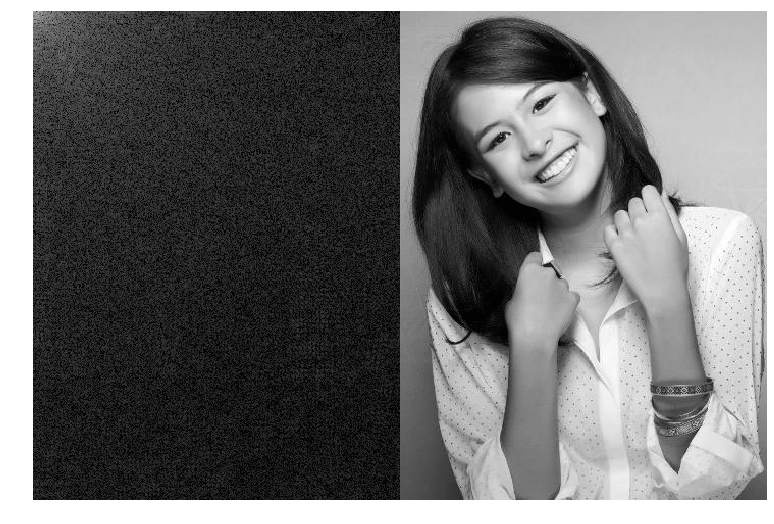

In [128]:
img_dct = dct2(img)
img_idct = idct2(img_dct)

# Calculate spectrum
magnitude_spectrum = 20*np.log(np.abs(img_dct))
magnitude_spectrum[magnitude_spectrum < 0] = 0
ori_combine = np.concatenate((magnitude_spectrum, img_idct), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(ori_combine, cmap = 'gray')
plt.show()

In [129]:
def diagonalFiltering(arr, start, end):
    y_size, x_size = arr.shape
    arr_1 = np.tile(np.arange(y_size).reshape(y_size, 1), (1, x_size))
    arr_2 = np.tile(np.arange(x_size).reshape(1, x_size), (y_size, 1))
    arr_3 = np.add(arr_1, arr_2)
    arr_4 = np.logical_and(arr_3 > start, arr_3 < end)
    arr[arr_4] = 1
    return arr


<Figure size 432x288 with 0 Axes>

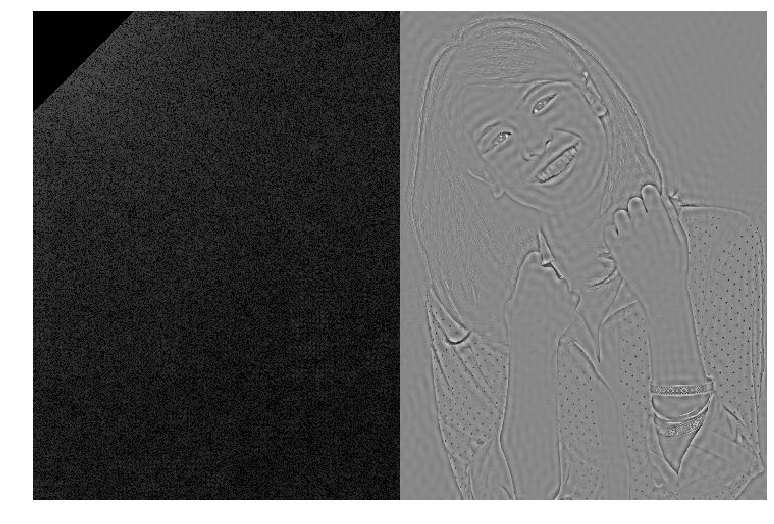

In [130]:
img_dct_lpf = img_dct.copy()

# Masking
img_dct_lpf = diagonalFiltering(img_dct_lpf, 0, 100)

# Inverse Transform
img_idct_lpf = idct2(img_dct_lpf)

# Calculate spectrum
magnitude_spectrum_lpf = 20*np.log(np.abs(img_dct_lpf))
magnitude_spectrum_lpf[magnitude_spectrum_lpf < 0] = 0
lpf_combine = np.concatenate((magnitude_spectrum_lpf, img_idct_lpf), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(lpf_combine, cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

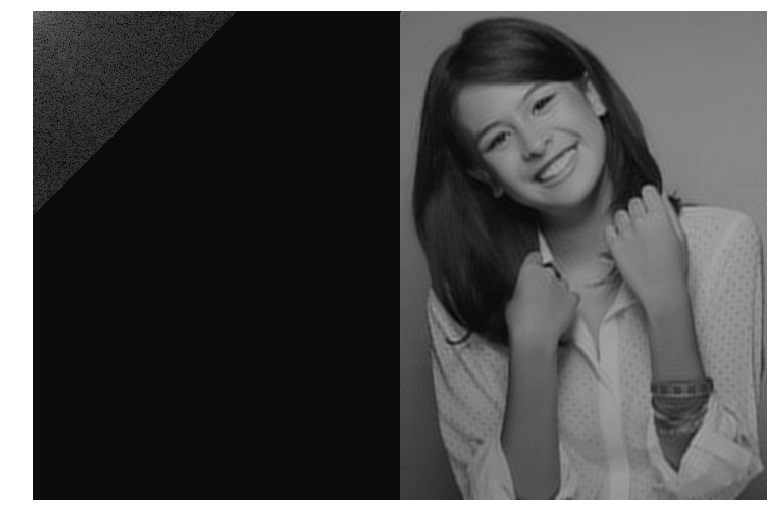

In [131]:
img_dct_hpf = img_dct.copy()
rows, cols = img_dct_hpf.shape

# Masking
img_dct_hpf = diagonalFiltering(img_dct_hpf, 200, 99999)

# Inverse Transform
img_idct_hpf = idct2(img_dct_hpf)

# Calculate spectrum
magnitude_spectrum_hpf = 20*np.log(np.abs(img_dct_hpf))
magnitude_spectrum_hpf[magnitude_spectrum_hpf < 0] = 0
hpf_combine = np.concatenate((magnitude_spectrum_hpf, img_idct_hpf), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(hpf_combine, cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

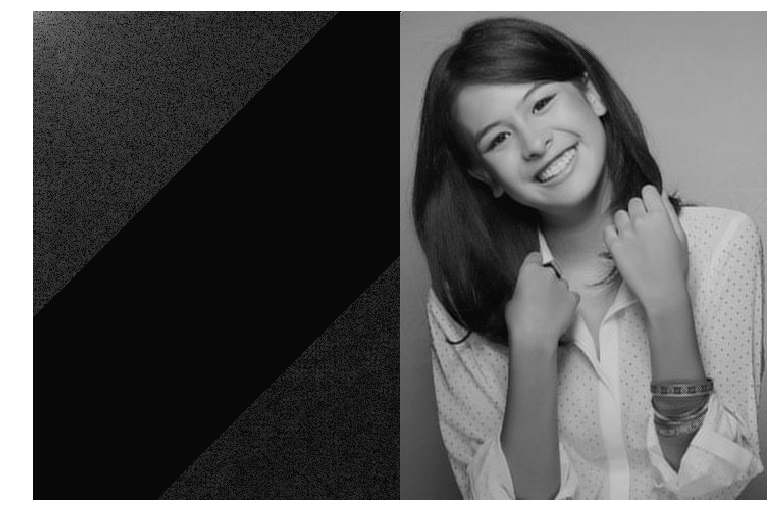

In [132]:
img_dct_xpf = img_dct.copy()
rows, cols = img_dct_hpf.shape

# Masking
img_dct_xpf = diagonalFiltering(img_dct_xpf, 300, 600)

# Inverse Transform
img_idct_xpf = idct2(img_dct_xpf)

# Calculate spectrum
magnitude_spectrum_xpf = 20*np.log(np.abs(img_dct_xpf))
magnitude_spectrum_xpf[magnitude_spectrum_xpf < 0] = 0
xpf_combine = np.concatenate((magnitude_spectrum_xpf, img_idct_xpf), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(xpf_combine, cmap = 'gray')
plt.show()

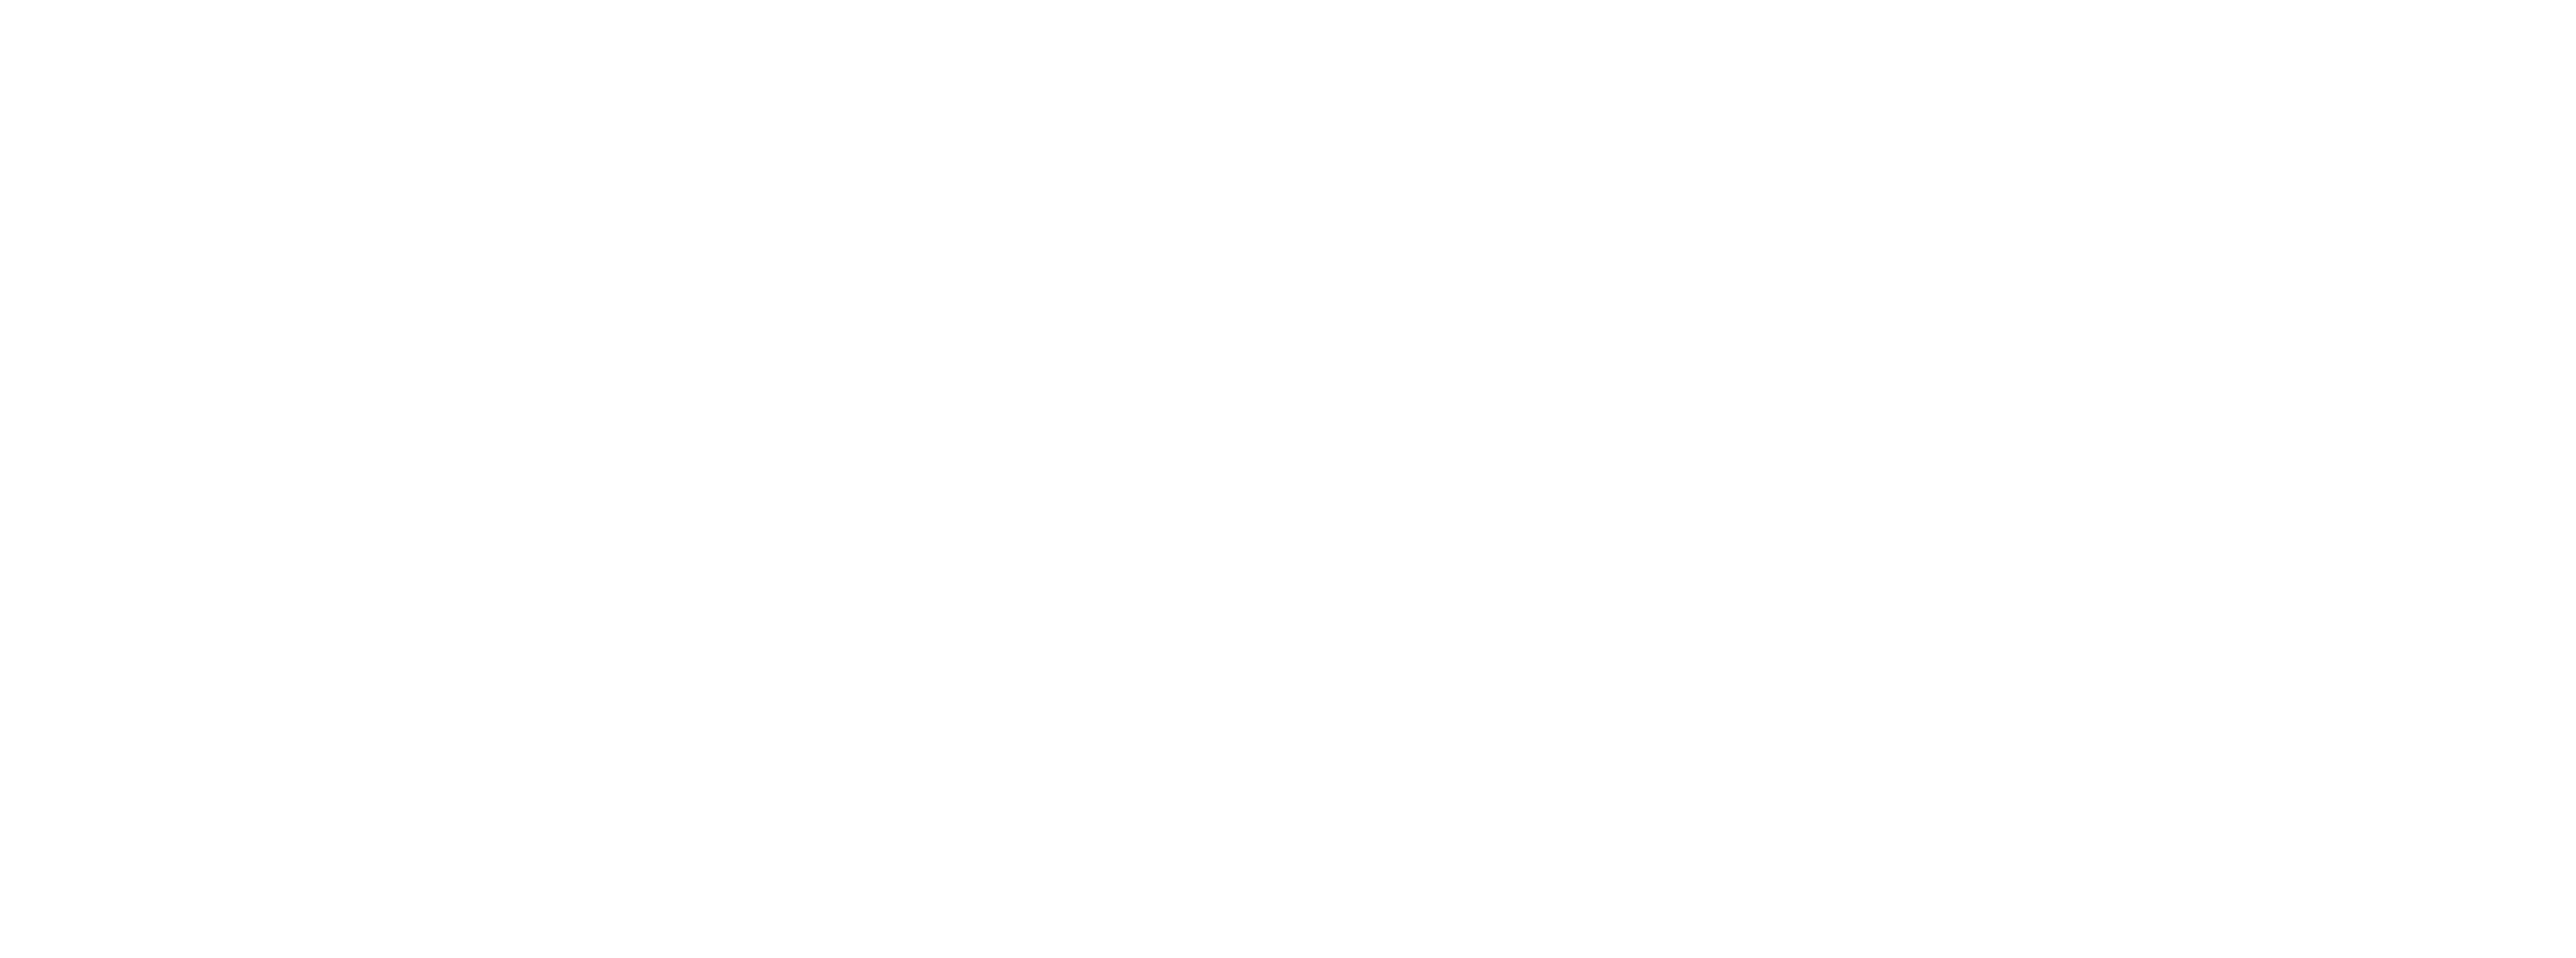

In [133]:
all_image = np.concatenate((ori_combine, hpf_combine, lpf_combine, xpf_combine), axis=0)


# # Show all result
plt.figure(figsize=(48, 18))
plt.axis('off')
plt.imsave('image_cosine_transform.png', all_image, cmap = 'gray')